In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup Data and Parameters ---
# The data points from the assignment: (1, 3) and (3, 6)
x_data = np.array([1, 3])
y_data = np.array([3, 6])

# Initial Parameter Values
m = -1.0
b = 1.0

# Hyperparameters
learning_rate = 0.1
iterations = 4  # Matching your group manual work
n = len(x_data)  # Number of data points (2)

# Lists to store history for visualization
m_history = [m]
b_history = [b]
cost_history = [] # To store MSE

print(f"{'Iter':<5} | {'m':<10} | {'b':<10} | {'MSE Cost':<10}")
print("-" * 50)

Iter  | m          | b          | MSE Cost  
--------------------------------------------------


In [2]:
# --- 2. The Gradient Descent Loop ---
for i in range(iterations):
    # A. Prediction (Forward Pass)
    y_pred = m * x_data + b

    # B. Calculate Error (Residuals)
    error = y_pred - y_data

    # C. Calculate Cost (Mean Squared Error) for tracking
    mse = np.mean(error ** 2)
    cost_history.append(mse)

    # Print current state (to compare with manual work)
    print(f"{i+1:<5} | {m:<10.4f} | {b:<10.4f} | {mse:<10.4f}")

    # D. Calculate Gradients (Explicit Chain Rule)
    # Gradient w.r.t m: (1/n) * sum(2 * error * x)
    m_gradient = (1/n) * np.sum(2 * error * x_data)

    # Gradient w.r.t b: (1/n) * sum(2 * error * 1)
    b_gradient = (1/n) * np.sum(2 * error)

    # E. Update Parameters
    m = m - (learning_rate * m_gradient)
    b = b - (learning_rate * b_gradient)

    # Store new values for plotting
    m_history.append(m)
    b_history.append(b)

1     | -1.0000    | 1.0000     | 36.5000   
2     | 1.7000     | 2.1000     | 1.0400    
3     | 1.2600     | 1.9000     | 0.0640    
4     | 1.3400     | 1.9160     | 0.0348    


In [3]:

# --- 3. Final Prediction ---
print("-" * 50)
final_y_pred = m * x_data + b
print(f"\nFinal Values after {iterations} iterations:")
print(f"Final m = {m:.4f}")
print(f"Final b = {b:.4f}")
print(f"Final Predictions for input {x_data}: {final_y_pred}")

--------------------------------------------------

Final Values after 4 iterations:
Final m = 1.3336
Final b = 1.8968
Final Predictions for input [1 3]: [3.2304 5.8976]


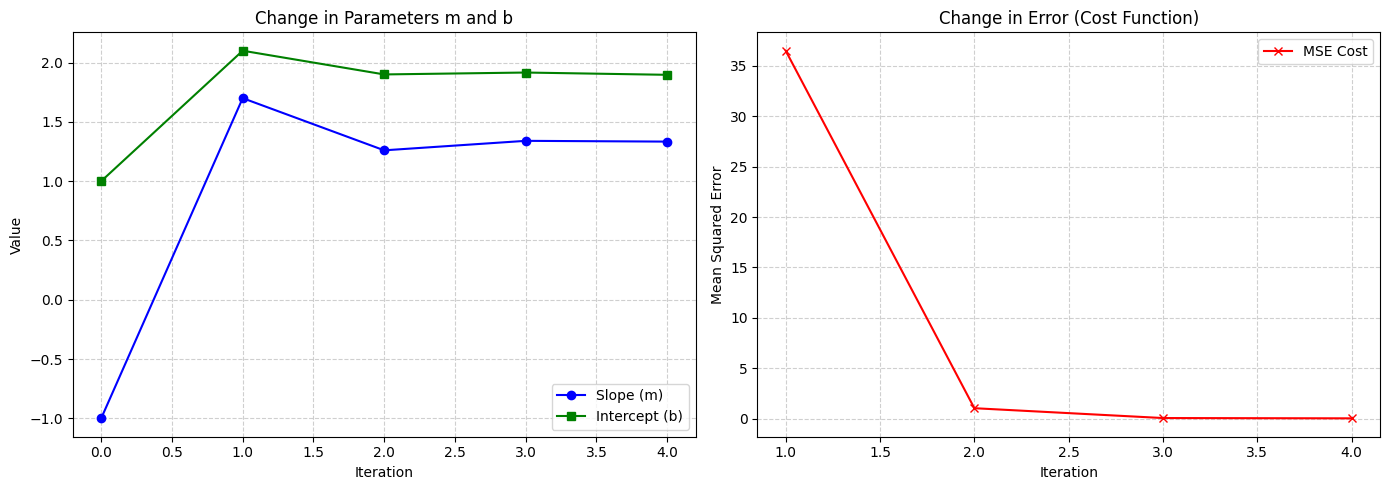

In [4]:
# --- 4. Visualization ---
plt.figure(figsize=(14, 5))

# Plot 1: Changes in m and b
plt.subplot(1, 2, 1)
plt.plot(range(len(m_history)), m_history, marker='o', label='Slope (m)', color='blue')
plt.plot(range(len(b_history)), b_history, marker='s', label='Intercept (b)', color='green')
plt.title('Change in Parameters m and b')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Plot 2: Change in Error (MSE)
plt.subplot(1, 2, 2)
# Note: We plot cost_history against iterations 1 to 4
plt.plot(range(1, iterations + 1), cost_history, marker='x', color='red', label='MSE Cost')
plt.title('Change in Error (Cost Function)')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()